In [5]:
import time
import numpy as np
import datetime
import random
import matplotlib.pyplot as plt
import statistics
from scipy.optimize import *
from autograd import grad, jacobian, hessian
from sklearn.linear_model import SGDRegressor

In [6]:
global eps
eps = 0.001

In [7]:
# Generate alpha and beta numbers in range (0,1)
alpha = random.uniform(0.0000000000000000001,0.9999999999999999999)
beta = random.uniform(0.0000000000000000001,0.9999999999999999999)

In [8]:
# The function ot generate our data to approximate (X, Y) with some noize 
def generate_data(k, alpha, beta):
    X = [x/100 for x in range(0,k)]
    noizes = np.random.normal(0,1,100)
    Y = [alpha * x + beta + noize for x, noize in zip(X, noizes)]
    return X, Y

In [13]:
# The function for calculating the means least squares
def loss(x, function=linear):
    sum = 0
    for i in range(100):
        sum += (function(X[i], x[0], x[1]) - Y[i])**2
    return sum

In [10]:
# Initial point for a,b which we define by minimizing the function of loss()
x0 = (0,0)

In [11]:
# Generate 100 points and values of function for them with noize
X, Y = generate_data(100, alpha, beta)

## Linear approximation

In [12]:
# Linear function for approximation
def linear(x, a, b):
    return a * x + b

#### Gradient Descent

In [21]:
bfgs = minimize(loss, x0, method='BFGS', args=(linear), tol=eps)

a_bfgs, b_bfgs = bfgs.x
bfgs

      fun: 95.9949610958696
 hess_inv: array([[ 0.06000597, -0.02970296],
       [-0.02970296,  0.01970296]])
      jac: array([1.14440918e-05, 1.52587891e-05])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.12363801,  0.72274574])

#### Conjugate Gradient Descent

In [22]:
conjugate_gradient = minimize(loss, x0, method='CG', args=(linear), tol=eps)

a_conjugate_gradient, b_conjugate_gradient = conjugate_gradient.x
conjugate_gradient

     fun: 95.99496109586865
     jac: array([ 9.53674316e-07, -9.53674316e-07])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([-0.12363815,  0.72274572])

#### Newton’s method 

In [23]:
newton = minimize(loss, x0, method='Newton-CG', jac=jacobian(loss), options={'disp': True})

a_newton, b_newton = newton.x
newton

         Current function value: 95.994961
         Iterations: 2
         Function evaluations: 59
         Gradient evaluations: 67
         Hessian evaluations: 0


     fun: 95.99496109586846
     jac: array([-2.23803109e-09, -5.83870197e-08])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 59
    nhev: 0
     nit: 2
    njev: 67
  status: 2
 success: False
       x: array([-0.12363828,  0.72274581])

#### Levenberg-Marquardt

In [24]:
popt, pcov, infodict, errmsg, ier = curve_fit(linear, X, Y, method='lm', full_output=True)

In [25]:
popt, infodict

(array([-0.12363828,  0.7227458 ]),
 {'fvec': array([-0.79113273, -2.2578441 ,  0.65158942, -0.06527337, -1.8338753 ,
          0.4917348 ,  0.18028101, -0.30168805, -1.09382988,  1.74150008,
          0.162685  , -0.77297249,  1.57371066, -1.44204894,  0.0743187 ,
          0.5778755 ,  0.66600472, -0.9809097 , -1.11005204,  1.03865334,
          0.5986306 ,  0.10016344, -0.31435577,  1.29045997, -1.22124471,
          1.04713853, -0.44092801,  0.06027989, -0.02795601, -0.72682812,
          2.39853203,  0.31676995, -0.50320592, -1.038322  , -0.93711096,
          0.7561139 ,  0.92360467,  0.3384052 ,  0.4056015 ,  0.79443561,
          0.63306267, -1.26719197,  0.40002905,  0.13787714,  1.14359736,
         -0.10075379, -1.10296025, -0.15007398, -0.82085883,  0.40112646,
         -0.6794097 ,  1.51534378, -1.22291801,  0.55260929,  0.23239943,
          0.17036071,  0.81198975,  2.37853366,  1.09733622, -1.85570589,
         -1.20578007,  2.35269701,  1.00203169, -0.29991557, -0.5152

In [27]:
len(infodict['fvec'])

100

In [28]:
a_lm, b_lm = popt

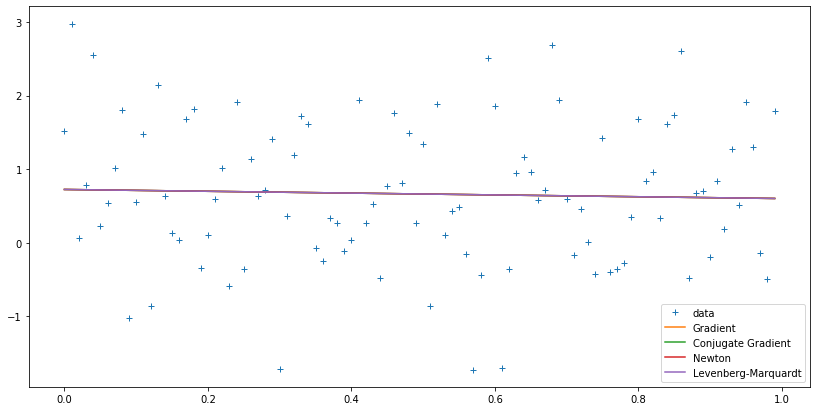

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(X, Y, '+', label='data')

Y_bfgs = [linear(x, a_bfgs, b_bfgs) for x in X]
plt.plot(X, Y_bfgs, label='Gradient')

Y_conjugate_gradient = [linear(x, a_conjugate_gradient, b_conjugate_gradient) for x in X]
plt.plot(X, Y_conjugate_gradient, label='Conjugate Gradient')

Y_newton = [linear(x, a_newton, b_newton) for x in X]
plt.plot(X, Y_newton, label='Newton')

Y_lm = [linear(x, a_lm, b_lm) for x in X]
plt.plot(X, Y_lm, label='Levenberg-Marquardt')

plt.legend()

## Rational approximation

In [31]:
# Rational function for approximation
def rational(x, a, b):
    return a / (1 + b * x)

#### Gradient Descent

In [32]:
bfgs = minimize(loss, x0, method='BFGS', args=(rational), tol=eps)

a_bfgs, b_bfgs = bfgs.x
bfgs

      fun: 95.89586774775837
 hess_inv: array([[0.04105887, 0.12332669],
       [0.12332669, 0.44416408]])
      jac: array([ 2.19345093e-05, -3.62396240e-04])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 11
     njev: 13
   status: 0
  success: True
        x: array([0.78276231, 0.39759266])

#### Conjugate Gradient Descent

In [33]:
conjugate_gradient = minimize(loss, x0, method='CG', args=(rational), tol=eps)

a_conjugate_gradient, b_conjugate_gradient = conjugate_gradient.x
conjugate_gradient

     fun: 95.89586774354507
     jac: array([-0.0001688 , -0.00028419])
 message: 'Optimization terminated successfully.'
    nfev: 66
     nit: 7
    njev: 16
  status: 0
 success: True
       x: array([0.78276448, 0.39760525])

#### Newton’s method 

In [34]:
newton = minimize(loss, x0, method='Newton-CG', jac=jacobian(loss), args=(rational), options={'disp': True})

a_newton, b_newton = newton.x
newton

Optimization terminated successfully.
         Current function value: 95.895868
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 60
         Hessian evaluations: 0


     fun: 95.89586771673724
     jac: array([ 3.08702672e-05, -1.72894257e-05])
 message: 'Optimization terminated successfully.'
    nfev: 12
    nhev: 0
     nit: 11
    njev: 60
  status: 0
 success: True
       x: array([0.78281055, 0.39776736])

#### Levenberg-Marquardt

In [35]:
popt, pcov, infodict, errmsg, ier = curve_fit(rational, X, Y, method='lm', full_output=True)

In [36]:
popt, infodict

(array([0.78293983, 0.39823397]),
 {'fvec': array([-0.7309387 , -2.19951925,  0.70806962, -0.01061357, -1.78101192,
          0.54282544,  0.22962231, -0.25407295, -1.04791811,  1.78573111,
          0.20525764, -0.73203615,  1.61303254, -1.40431993,  0.11047618,
          0.61248255,  0.69908222, -0.94934114, -1.079972  ,  1.06726504,
          0.6257939 ,  0.12589808, -0.29003027,  1.31339562, -1.1996798 ,
          1.06735157, -0.42204815,  0.07784505, -0.01168728, -0.71183774,
          2.41226197,  0.32925714, -0.49194396, -1.02826795, -0.92824767,
          0.7638034 ,  0.93013717,  0.34379731,  0.40986966,  0.79759609,
          0.63513159, -1.26619869,  0.39996247,  0.13676633,  1.14145777,
         -0.10390688, -1.10711167, -0.15520875, -0.82696211,  0.39406937,
         -0.68740605,  1.50642257, -1.23274983,  0.541881  ,  0.22078864,
          0.15788127,  0.79865536,  2.36435789,  1.08233253, -1.8715242 ,
         -1.22239981,  2.33528891,  0.98384815, -0.31886174, -0.534902

In [40]:
len(infodict['fvec'])

100

In [41]:
a_lm, b_lm = popt

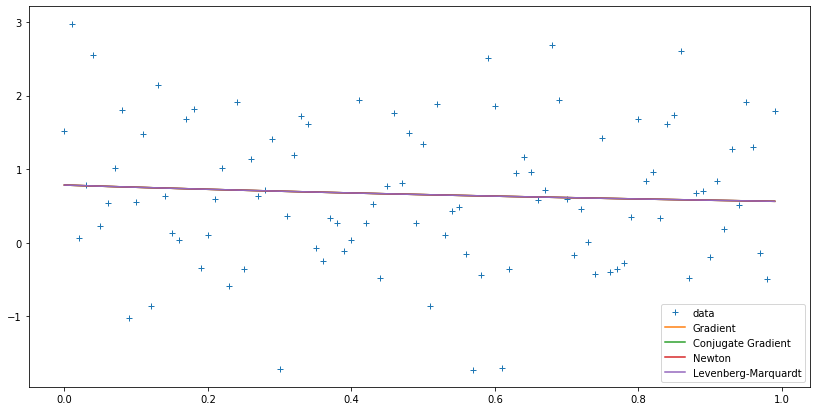

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(X, Y, '+', label='data')

Y_bfgs = [rational(x, a_bfgs, b_bfgs) for x in X]
plt.plot(X, Y_bfgs, label='Gradient')

Y_conjugate_gradient = [rational(x, a_conjugate_gradient, b_conjugate_gradient) for x in X]
plt.plot(X, Y_conjugate_gradient, label='Conjugate Gradient')

Y_newton = [rational(x, a_newton, b_newton) for x in X]
plt.plot(X, Y_newton, label='Newton')


Y_lm = [rational(x, a_lm, b_lm) for x in X]
plt.plot(X, Y_lm, label='Levenberg-Marquardt')

plt.legend()